In [2]:
import sys
sys.path.append("../../")
DATA_PATH = "../../data/"
SAVE_PATH = "../../plots"

import abm_py as abm
import matplotlib.pyplot as plt
import numpy as np
import py_common.utility as utility
from py_common.units import *
from py_common.scattering_dependence import *

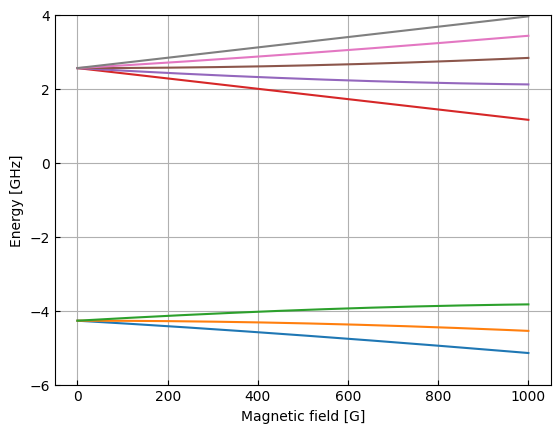

In [24]:
rb = abm.HifiProblemBuilder(1, 3)
rb.with_hyperfine_coupling(0.113990 * CMINV)

mag_fields = np.linspace(0, 1000, 500)
states = np.array(rb.build().states_range(mag_fields)) / GHZ

fig, ax = utility.plot()
ax.plot(mag_fields, states)
ax.set_ylim(-6, 4)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Energy [GHz]");

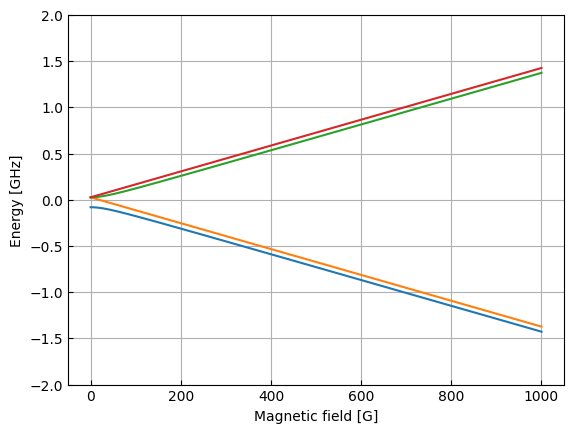

In [25]:
srf = abm.HifiProblemBuilder(1, 1)
srf.with_hyperfine_coupling((3.2383e-3 + 1.0096e-3 / 3.) * CMINV)

mag_fields = np.linspace(0, 1000, 500)
states = np.array(srf.build().states_range(mag_fields)) / GHZ

fig, ax = utility.plot()
ax.plot(mag_fields, states)
ax.set_ylim(-2, 2)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Energy [GHz]");

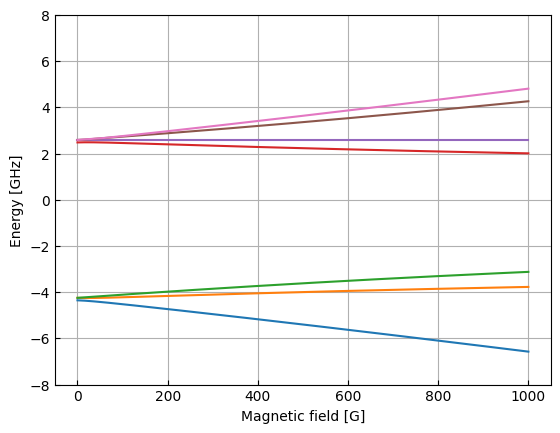

In [32]:
srf_rb = abm.DoubleHifiProblemBuilder(srf, rb)
srf_rb.with_projection(2)

mag_fields = np.linspace(0, 1000, 500)
states = np.array(srf_rb.build().states_range(mag_fields)) / GHZ

fig, ax = utility.plot()
ax.plot(mag_fields, states)
ax.set_ylim(-8, 8)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Energy [GHz]");

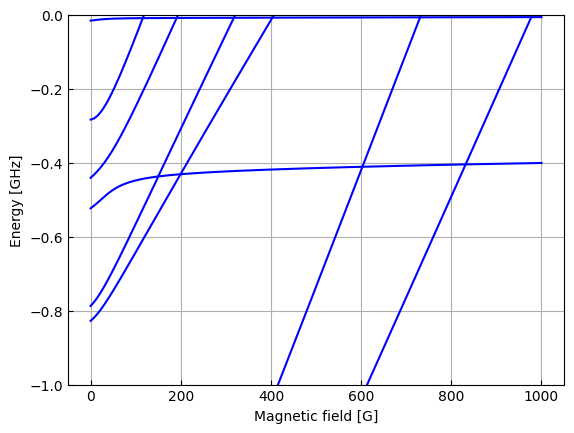

In [71]:
def fc_approx(e1, e2):
	k1 = np.sqrt(-e1)
	k2 = np.sqrt(-e2)

	return 2 * np.sqrt(k1 * k2) / (k1 + k2)

srf_rb_abm = abm.ABMProblemBuilder(srf, rb)
srf_rb_abm.with_projection(2)
singlet_energies = np.array([-8.987132311, -3.433095136, 
							 -0.8311063257, -5.0790089365E-02])[::-1] * GHZ
triplet_energies = np.array([-6.317805415, -2.106450732, 
							 -0.3656155367, -2.4018600610E-03])[::-1] * GHZ

# s_grid, t_grid = np.meshgrid(singlet_energies, triplet_energies, indexing="ij")
# fc_factors = fc_approx(s_grid, t_grid)
fc_factors = np.identity(len(singlet_energies))


srf_rb_abm.with_vibrational(singlet_energies, triplet_energies, fc_factors.flatten())

states_abm = np.array(srf_rb_abm.build().states_range(mag_fields)) / GHZ

fig, ax = utility.plot()
ax.plot(mag_fields, states_abm - states[:, 0:1], color = "blue")
ax.set_ylim(-1, 0)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Energy [GHz]");

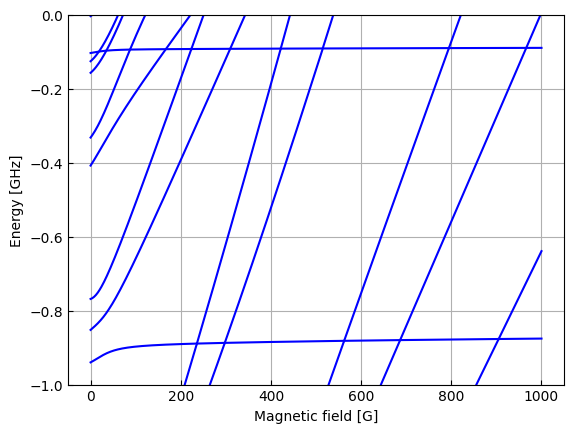

In [70]:
srf_rb_abm = abm.ABMProblemBuilder(srf, rb)
srf_rb_abm.with_projection(2)
singlet_energies = np.array([-11.28226128, -6.948700536, 
                             -5.021048299, -2.363000254,
                             -1.124373889, -0.1536226368])[::-1] * GHZ
triplet_energies = np.array([-8.681722839, -7.273516850, 
                             -5.679382565, -3.087971711,
                             -0.8561479145, -8.4107642053E-02])[::-1] * GHZ

fc_factors = np.identity(len(singlet_energies))


srf_rb_abm.with_vibrational(singlet_energies, triplet_energies, fc_factors.flatten())

states_abm = np.array(srf_rb_abm.build().states_range(mag_fields)) / GHZ

fig, ax = utility.plot()
ax.plot(mag_fields, states_abm - states[:, 0:1], color = "blue")
ax.set_ylim(-1, 0)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Energy [GHz]");

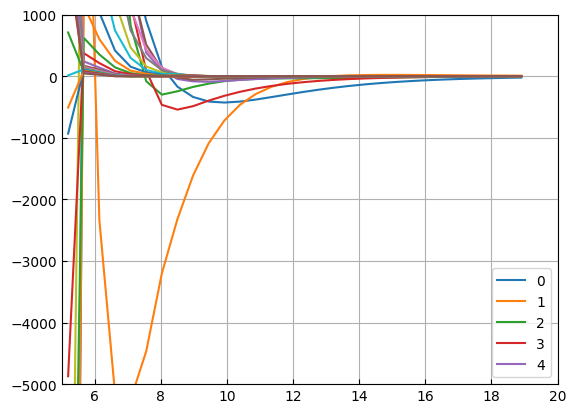

In [ ]:
data = utility.load(f"{DATA_PATH}/SrF_Rb_triplet_dec.dat")
scalings = data[:, 0]
values_legendre = data[:, 1:]

fig, ax = utility.plot()
ax.plot(scalings, values_legendre / CMINV)
ax.legend([str(i) for i in range(5)])

ax.set_xlim(5, 20)
ax.set_ylim(-5000, 1000);

5.129498239635018


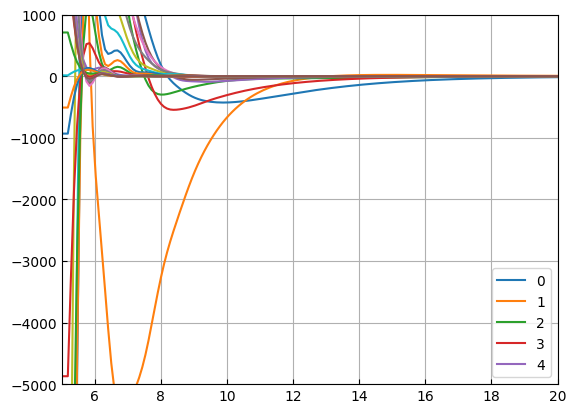

In [ ]:
data = utility.load(f"{DATA_PATH}/SrF_Rb_triplet_dec_interpolated.dat")
scalings = data[:, 0]
values_legendre = data[:, 1:]

fig, ax = utility.plot()
ax.plot(scalings, values_legendre / CMINV)
ax.legend([str(i) for i in range(5)])

ax.set_xlim(5, 20)
ax.set_ylim(-5000, 1000);

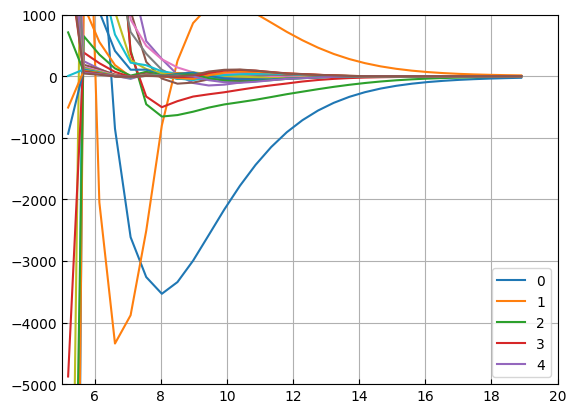

In [ ]:
data = utility.load(f"{DATA_PATH}/SrF_Rb_singlet_dec.dat")
scalings = data[:, 0]
values_legendre = data[:, 1:]

fig, ax = utility.plot()
ax.plot(scalings, values_legendre / CMINV)
ax.legend([str(i) for i in range(5)])

ax.set_xlim(5, 20)
ax.set_ylim(-5000, 1000);

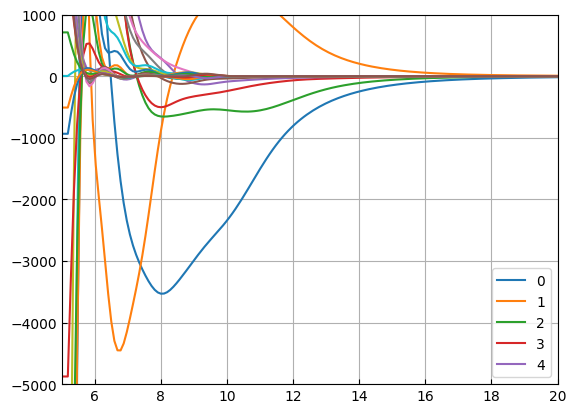

In [ ]:
data = utility.load(f"{DATA_PATH}/SrF_Rb_singlet_dec_interpolated.dat")
scalings = data[:, 0]
values_legendre = data[:, 1:]

fig, ax = utility.plot()
ax.plot(scalings, values_legendre / CMINV)
ax.legend([str(i) for i in range(5)])

ax.set_xlim(5, 20)
ax.set_ylim(-5000, 1000);

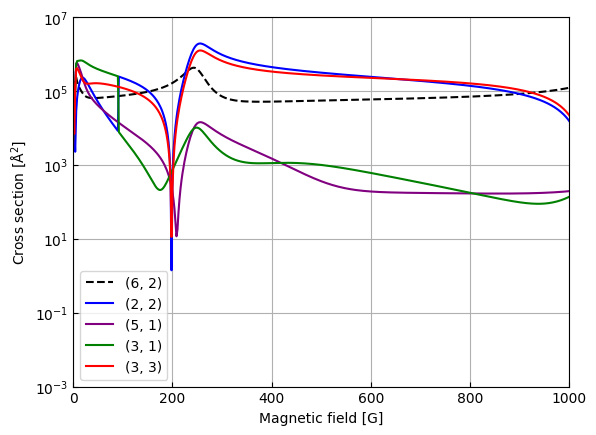

In [3]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scatterings_n_0.json")

fig, ax = utility.plot()
ax.plot(data.parameters, data.elastic_cross_sections() / ANGS**2, linestyle = "--", color = "black", label = "(6, 2)")
ax.plot(data.parameters, data.inelastic_cross_sections(0) / ANGS**2, color = "blue", label = "(2, 2)")
ax.plot(data.parameters, data.inelastic_cross_sections(3) / ANGS**2, color = "purple", label = "(5, 1)")
ax.plot(data.parameters, data.inelastic_cross_sections(1) / ANGS**2, color = "green", label = "(3, 1)")
ax.plot(data.parameters, data.inelastic_cross_sections(2) / ANGS**2, color = "red", label = "(3, 3)")

ax.set_yscale("log")
ax.set_ylim(1e-3, 1e7)
ax.set_xlim(0, 1000)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel(r"Cross section [Å$^2$]")
ax.legend();
fig.savefig(f"{SAVE_PATH}/SrF_Rb_scatterings_n_max_0.pdf");

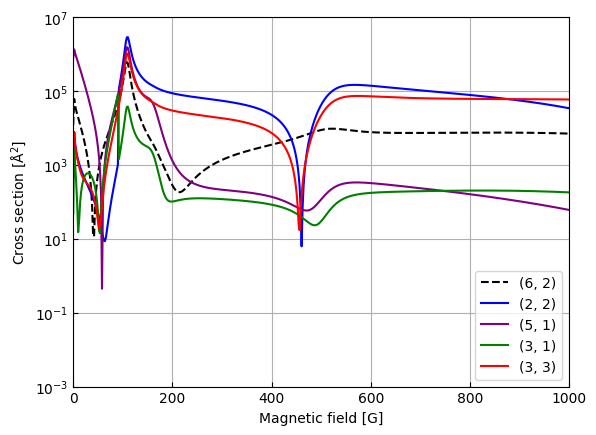

In [4]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scatterings.json")

fig, ax = utility.plot()
ax.plot(data.parameters, data.elastic_cross_sections() / ANGS**2, linestyle = "--", color = "black", label = "(6, 2)")
ax.plot(data.parameters, data.inelastic_cross_sections(0) / ANGS**2, color = "blue", label = "(2, 2)")
ax.plot(data.parameters, data.inelastic_cross_sections(3) / ANGS**2, color = "purple", label = "(5, 1)")
ax.plot(data.parameters, data.inelastic_cross_sections(1) / ANGS**2, color = "green", label = "(3, 1)")
ax.plot(data.parameters, data.inelastic_cross_sections(2) / ANGS**2, color = "red", label = "(3, 3)")

ax.set_yscale("log")
ax.set_ylim(1e-3, 1e7)
ax.set_xlim(0, 1000)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel(r"Cross section [Å$^2$]")
ax.legend();
fig.savefig(f"{SAVE_PATH}/SrF_Rb_scatterings_n_max_10.pdf");

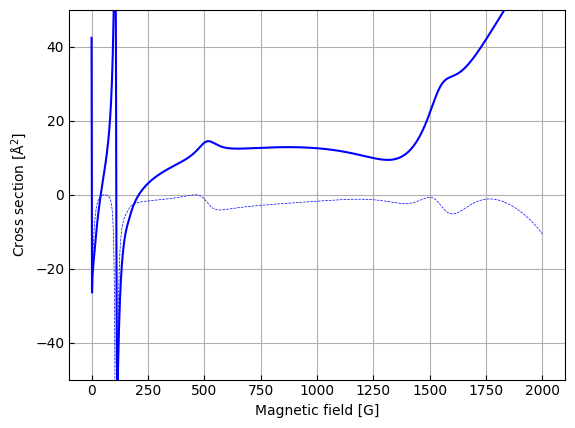

In [ ]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scatterings.json")

fig, ax = utility.plot()
ax.plot(data.parameters, data.s_lengths().real, color = "blue")
ax.plot(data.parameters, data.s_lengths().imag, color = "blue", linestyle="--", linewidth = 0.5)

ax.set_ylim(-50, 50)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Scattering length [bohr]");

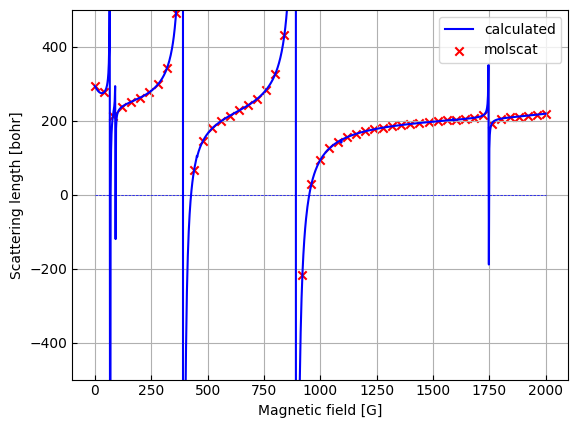

In [54]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scatterings_n_0_ground.json")

fig, ax = utility.plot()
ax.plot(data.parameters, data.s_lengths().real, color = "blue", label="calculated")
ax.plot(data.parameters, data.s_lengths().imag, color = "blue", linestyle="--", linewidth = 0.5)

try:
	data = read_molscat_field_dependence(f"{DATA_PATH}/srf_rb_n_0_molscat.3")
	ax.scatter(data[::2, 0], data[::2, 1], color = "red", marker="x", label="molscat")
except:
	pass

ax.set_ylim(-500, 500)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Scattering length [bohr]")
ax.legend();
fig.savefig(f"{SAVE_PATH}/SrF_Rb_scattering_n_0.pdf")

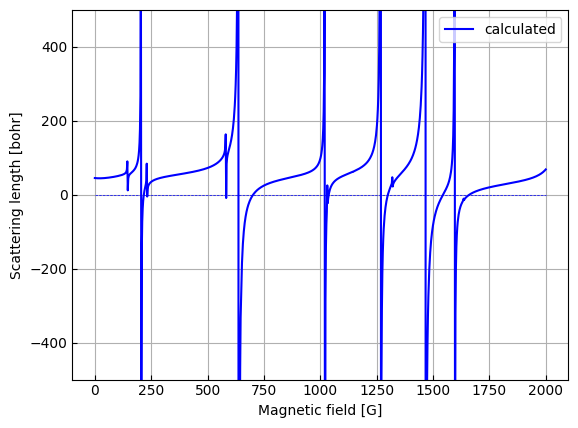

In [2]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scatterings_ground_n_max_10_n_tot_0.json")

fig, ax = utility.plot()
ax.plot(data.parameters, data.s_lengths().real, color = "blue", label = "calculated")
ax.plot(data.parameters, data.s_lengths().imag, color = "blue", linestyle="--", linewidth = 0.5)

try:
	data = read_molscat_field_dependence(f"{DATA_PATH}/srf_rb_n_10_molscat.3")
	ax.scatter(data[:, 0], data[:, 1], color = "red", marker="x", label="molscat")
except:
	pass

ax.set_ylim(-500, 500)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Scattering length [bohr]")
ax.legend();

fig.savefig(f"{SAVE_PATH}/SrF_Rb_scattering_n_10.pdf")

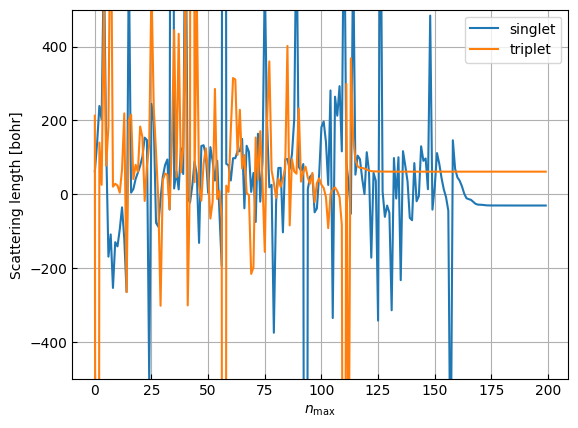

In [56]:
data = utility.load(f"{DATA_PATH}/srf_rb_potential_scattering_convergence.dat")
scalings = data[:, 0]
singlet = data[:, 1]
triplet = data[:, 2]

fig, ax = utility.plot()
ax.plot(scalings, singlet, label = "singlet")
ax.plot(scalings, triplet, label = "triplet")

ax.set_ylim(-500, 500)
ax.set_xlabel(r"$n_\text{max}$")
ax.set_ylabel("Scattering length [bohr]")
ax.legend();

fig.savefig(f"{SAVE_PATH}/SrF_Rb_triplet_singlet_convergence.pdf")

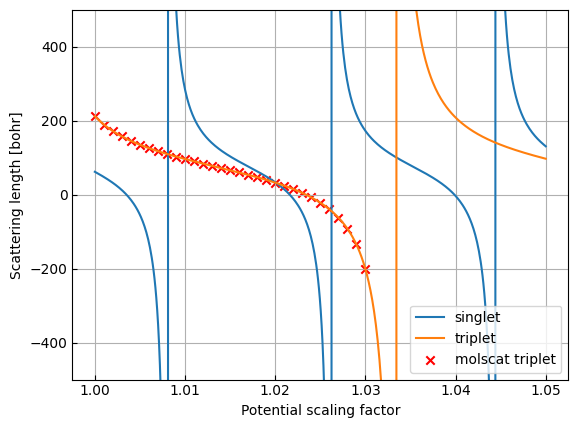

In [57]:
data = utility.load(f"{DATA_PATH}/srf_rb_potential_scaling_n_max_0.dat")
scalings = data[:, 0]
singlet = data[:, 1]
triplet = data[:, 2]

fig, ax = utility.plot()
ax.plot(scalings, singlet, label = "singlet")
ax.plot(scalings, triplet, label = "triplet")

try:
	data = read_molscat_field_dependence(f"{DATA_PATH}/srf_rb_triplet_n_0_scaling.3", ParameterType.Scaling)
	ax.scatter(data[:, 0], data[:, 1], color = "red", marker="x", label="molscat triplet")
except:
	pass

ax.set_ylim(-500, 500)
ax.set_xlabel("Potential scaling factor")
ax.set_ylabel("Scattering length [bohr]")
ax.legend();
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_n_0.pdf")

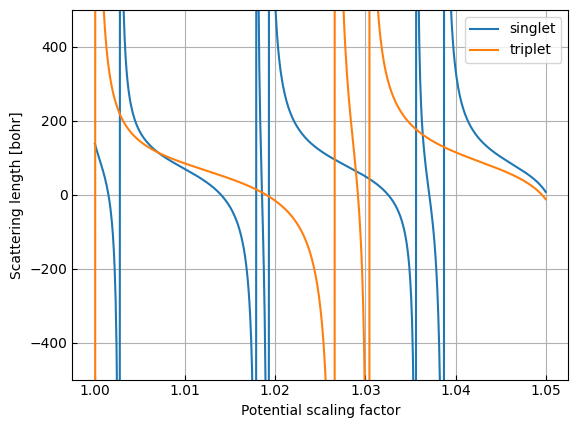

In [58]:
data = utility.load(f"{DATA_PATH}/srf_rb_potential_scaling_n_max_1.dat")
scalings = data[:, 0]
singlet = data[:, 1]
triplet = data[:, 2]

fig, ax = utility.plot()
ax.plot(scalings, singlet)
ax.plot(scalings, triplet)

ax.set_ylim(-500, 500)
ax.set_xlabel("Potential scaling factor")
ax.set_ylabel("Scattering length [bohr]")
ax.legend(["singlet", "triplet"]);
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_n_1.pdf")

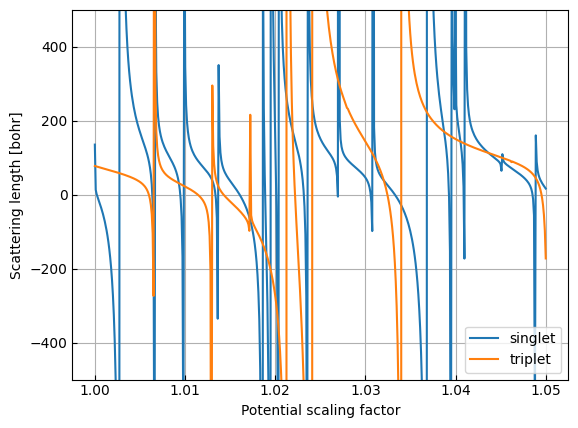

In [59]:
data = utility.load(f"{DATA_PATH}/srf_rb_potential_scaling_n_max_5.dat")
scalings = data[:, 0]
singlet = data[:, 1]
triplet = data[:, 2]

fig, ax = utility.plot()
ax.plot(scalings, singlet)
ax.plot(scalings, triplet)

ax.set_ylim(-500, 500)
ax.set_xlabel("Potential scaling factor")
ax.set_ylabel("Scattering length [bohr]")
ax.legend(["singlet", "triplet"]);
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_n_5.pdf")

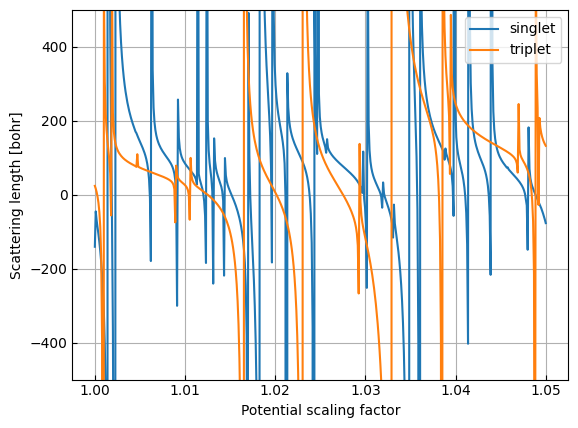

In [60]:
data = utility.load(f"{DATA_PATH}/srf_rb_potential_scaling_n_max_10.dat")
scalings = data[:, 0]
singlet = data[:, 1]
triplet = data[:, 2]

fig, ax = utility.plot()
ax.plot(scalings, singlet)
ax.plot(scalings, triplet)

ax.set_ylim(-500, 500)
ax.set_xlabel("Potential scaling factor")
ax.set_ylabel("Scattering length [bohr]")
ax.legend(["singlet", "triplet"]);
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_n_10.pdf")

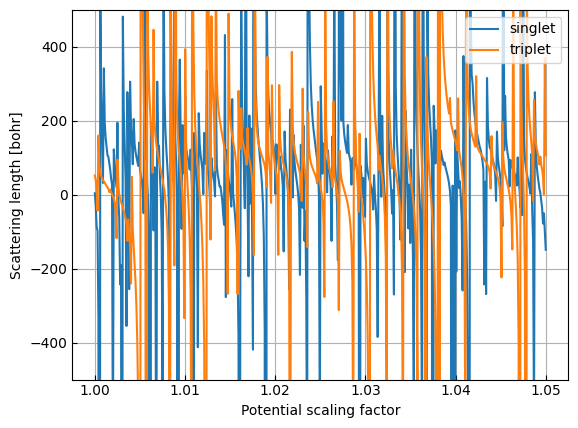

In [61]:
data = utility.load(f"{DATA_PATH}/srf_rb_potential_scaling_n_max_50.dat")
scalings = data[:, 0]
singlet = data[:, 1]
triplet = data[:, 2]

fig, ax = utility.plot()
ax.plot(scalings, singlet)
ax.plot(scalings, triplet)

ax.set_ylim(-500, 500)
ax.set_xlabel("Potential scaling factor")
ax.set_ylabel("Scattering length [bohr]")
ax.legend(["singlet", "triplet"]);
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_n_50.pdf")

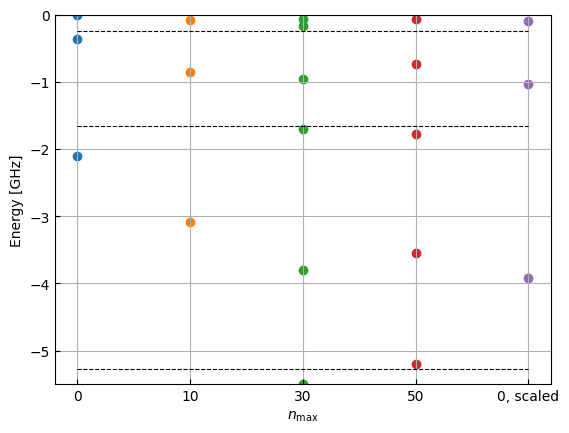

In [14]:
n_maxes = [0, 10, 30, 50]
fig, ax = utility.plot()
for n_max in n_maxes:
    bounds = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_{n_max}_triplet.dat")
    ax.scatter([str(n_max) for _ in bounds], bounds)

bounds_0_scaled = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_0_scaled_10_triplet.dat")
ax.scatter(["0, scaled" for _ in bounds_0_scaled], bounds_0_scaled)

x = ["0", "10", "30", "50", "0, scaled"]
for value in [0.246, 1.660, 5.280]:
	ax.plot(x, [-value for _ in range(5)], linestyle="--", color="black", linewidth=0.8)

ax.set_ylabel("Energy [GHz]")
ax.set_xlabel(r"$n_\text{max}$")
ax.set_ylim(-5.5, 0);
fig.savefig(f"{SAVE_PATH}/SrF_Rb_bounds_triplet.pdf")

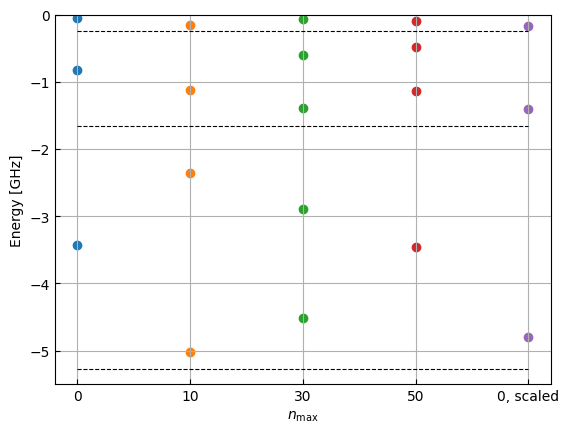

In [15]:
n_maxes = [0, 10, 30, 50]
fig, ax = utility.plot()
for n_max in n_maxes:
    bounds = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_{n_max}_singlet.dat")
    ax.scatter([str(n_max) for _ in bounds], bounds)

bounds_0_scaled = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_0_scaled_10_singlet.dat")
ax.scatter(["0, scaled" for _ in bounds_0_scaled], bounds_0_scaled)

x = ["0", "10", "30", "50", "0, scaled"]
for value in [0.246, 1.660, 5.280]:
	ax.plot(x, [-value for _ in range(5)], linestyle="--", color="black", linewidth=0.8)

ax.set_ylabel("Energy [GHz]")
ax.set_xlabel(r"$n_\text{max}$");
ax.set_ylim(-5.5, 0);
fig.savefig(f"{SAVE_PATH}/SrF_Rb_bounds_singlet.pdf")

In [9]:
import re

class Parameter(Enum):
    MagneticField = 1,
    ScalingFactor = 2,

def get_bound_energies(filename, parameter = Parameter.MagneticField):
    results = []
    energy_unit = None

    # Define a pattern that matches numbers (with optional scientific notation)
    num_pattern = r"[-+]?[0-9]*\.?[0-9]+(?:[eE][-+]?[0-9]+)?"
    
    # Regular expression for magnetic field lines
    field = "MAGNETIC Z FIELD"
    match parameter:
        case Parameter.MagneticField:
            field = "MAGNETIC Z FIELD"
        case Parameter.ScalingFactor:
            field = "POTL SCALING FACTOR"

    field_re = re.compile(rf"EFV SET\s+\d+:\s+{field} =\s+({num_pattern})")
    
    # Regular expression for energy lines.
    # This regex captures both the energy value and the energy unit.
    energy_re = re.compile(
        r"CONVERGED ON STATE NUMBER\s+\d+\s+AT\s+.*?ENERGY\s*=\s*(?P<energy>" + num_pattern + r")\s*(?P<unit>[A-Za-z]+)"
    )

    current_field = None
    current_energies = []

    with open(filename, 'r') as file:
        for line in file:
            # Check for a magnetic field line.
            field_match = field_re.search(line)
            if field_match:
                # If we were collecting a block, save it before starting a new one.
                if current_field is not None:
                    results.append((float(current_field), current_energies))
                current_field = field_match.group(1)
                current_energies = []  # Reset energies for the new block.
                continue

            # Check for an energy line.
            energy_match = energy_re.search(line)
            if energy_match and current_field is not None:
                energy_value = energy_match.group("energy")
                unit = energy_match.group("unit")
                # Store the energy unit (assume it's the same throughout the file)
                if energy_unit is None:
                    energy_unit = unit
                elif energy_unit != unit:
                    print(f"Warning: Multiple energy units found! {energy_unit} vs {unit}")
                current_energies.append(float(energy_value))

    # Add the last block if present.
    if current_field is not None:
        results.append((float(current_field), current_energies))

    return results, energy_unit


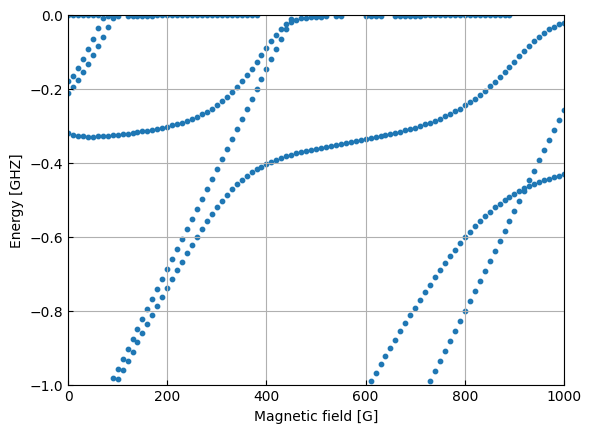

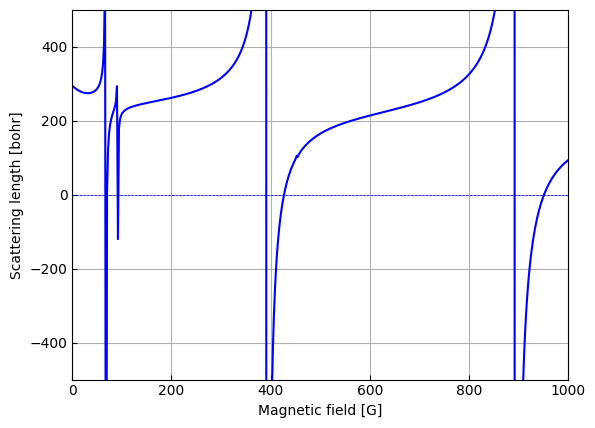

In [65]:
filename = f"{DATA_PATH}/srf_rb_bounds_2.output"
data, unit = get_bound_energies(filename)

field_points = []
energy_points = []
for field, energies in data:
    for energy in energies:
        field_points.append(field)
        energy_points.append(energy)
        
fig, ax = utility.plot()
ax.scatter(field_points, energy_points, s = 10)
ax.set_ylabel(f"Energy [{unit}]")
ax.set_xlabel("Magnetic field [G]")
ax.set_xlim(0, 1000)
ax.set_ylim(-1, 0)
fig.savefig(f"{SAVE_PATH}/SrF_Rb_bounds_n_0.pdf")

####################################

data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scatterings_n_0_ground.json")

fig, ax = utility.plot()
ax.plot(data.parameters, data.s_lengths().real, color = "blue")
ax.plot(data.parameters, data.s_lengths().imag, color = "blue", linestyle="--", linewidth = 0.5)

ax.set_ylim(-500, 500)
ax.set_xlim(0, 1000)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Scattering length [bohr]");
fig.savefig(f"{SAVE_PATH}/SrF_Rb_scattering_n_0_to_1000.pdf")

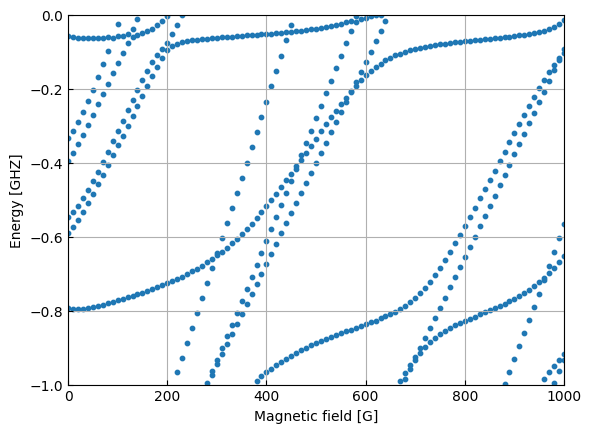

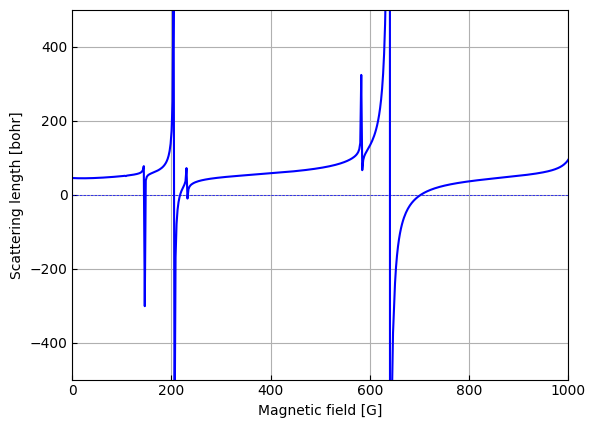

In [ ]:
filename = f"{DATA_PATH}/srf_rb_bounds_n_10.output"
data, unit = get_bound_energies(filename)

field_points = []
energy_points = []
for field, energies in data:
    for energy in energies:
        field_points.append(field)
        energy_points.append(energy)
        
fig, ax = utility.plot()
ax.scatter(field_points, energy_points, s = 10)
ax.set_ylabel(f"Energy [{unit}]")
ax.set_xlabel("Magnetic field [G]")
ax.set_xlim(0, 1000)
ax.set_ylim(-1, 0)
fig.savefig(f"{SAVE_PATH}/SrF_Rb_bounds_n_10.pdf")

####################################

data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scatterings_ground_n_max_10_n_tot_0.json")

fig, ax = utility.plot()
ax.plot(data.parameters, data.s_lengths().real, color = "blue")
ax.plot(data.parameters, data.s_lengths().imag, color = "blue", linestyle="--", linewidth = 0.5)

ax.set_ylim(-500, 500)
ax.set_xlim(0, 1000)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Scattering length [bohr]");
fig.savefig(f"{SAVE_PATH}/SrF_Rb_scattering_n_10_to_1000.pdf")

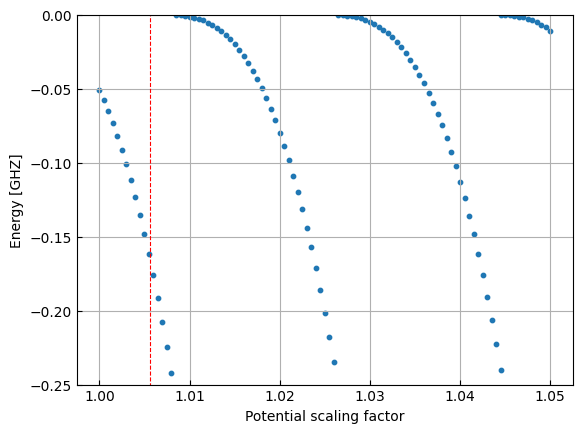

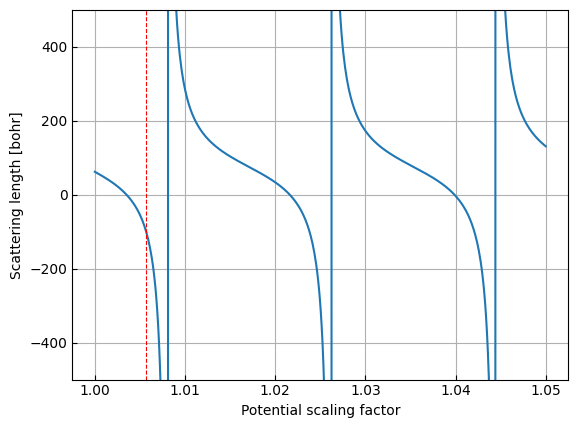

In [25]:
filename = f"{DATA_PATH}/srf_rb_bounds_scale_n_0_singlet.output"
data, unit = get_bound_energies(filename, parameter=Parameter.ScalingFactor)

field_points = []
energy_points = []
for field, energies in data:
    for energy in energies:
        field_points.append(field)
        energy_points.append(energy)
        
fig, ax = utility.plot()
ax.vlines([1.0056292421443], [-500], [500], color = "red", linestyles="--", linewidth=0.8)

ax.scatter(field_points, energy_points, s = 10)
ax.set_ylabel(f"Energy [{unit}]")
ax.set_xlabel("Potential scaling factor")
ax.set_ylim(-0.25, 0)
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_bounds_n_0_singlet.pdf")

####################################

data = utility.load(f"{DATA_PATH}/srf_rb_potential_scaling_n_max_0.dat")
scalings = data[:, 0]
singlet = data[:, 1]
triplet = data[:, 2]

fig, ax = utility.plot()
ax.plot(scalings, singlet)

ax.vlines([1.0056292421443], [-500], [500], color = "red", linestyles="--", linewidth=0.8)

ax.set_ylim(-500, 500)
ax.set_xlabel("Potential scaling factor")
ax.set_ylabel("Scattering length [bohr]");
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_scattering_n_0_singlet.pdf")

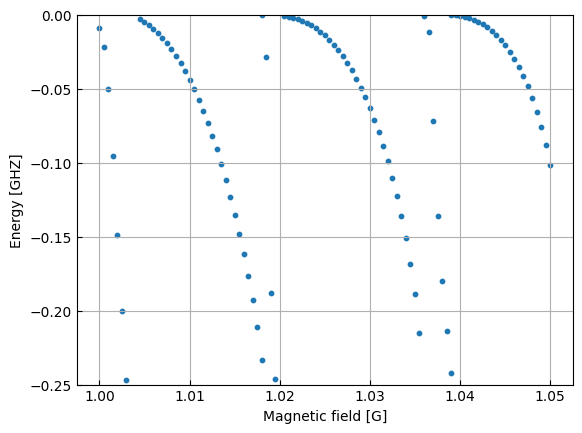

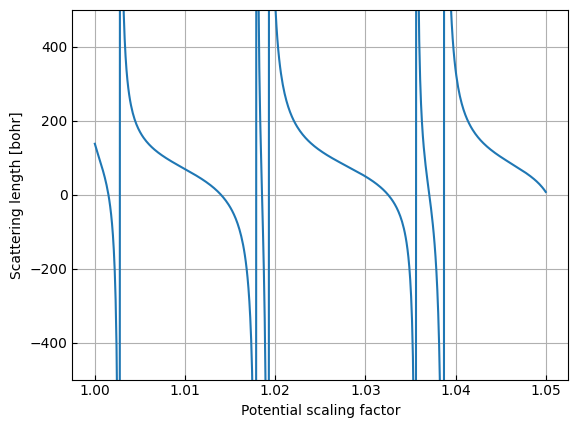

In [68]:
filename = f"{DATA_PATH}/srf_rb_bounds_scale_n_1_singlet.output"
data, unit = get_bound_energies(filename, parameter=Parameter.ScalingFactor)

field_points = []
energy_points = []
for field, energies in data:
    for energy in energies:
        field_points.append(field)
        energy_points.append(energy)
        
fig, ax = utility.plot()
ax.scatter(field_points, energy_points, s = 10)
ax.set_ylabel(f"Energy [{unit}]")
ax.set_xlabel("Magnetic field [G]")
ax.set_ylim(-0.25, 0)
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_bounds_n_1_singlet.pdf")

####################################

data = utility.load(f"{DATA_PATH}/srf_rb_potential_scaling_n_max_1.dat")
scalings = data[:, 0]
singlet = data[:, 1]
triplet = data[:, 2]

fig, ax = utility.plot()
ax.plot(scalings, singlet)
# ax.plot(scalings, triplet)

ax.set_ylim(-500, 500)
ax.set_xlabel("Potential scaling factor")
ax.set_ylabel("Scattering length [bohr]");
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_scattering_n_1_singlet.pdf")

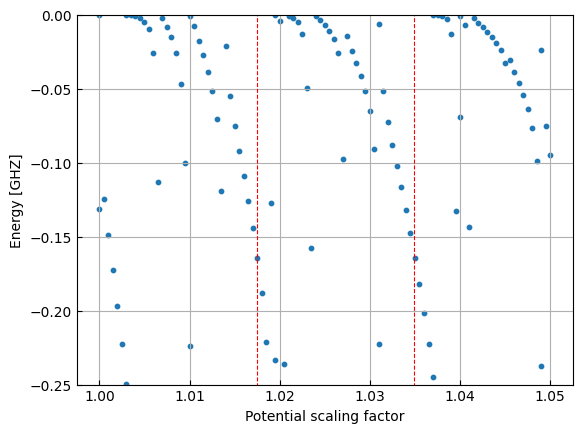

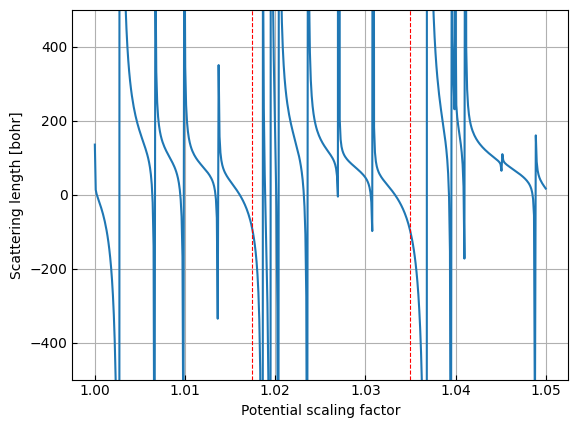

In [26]:
filename = f"{DATA_PATH}/srf_rb_bounds_scale_n_5_singlet.output"
data, unit = get_bound_energies(filename, parameter=Parameter.ScalingFactor)

field_points = []
energy_points = []
for field, energies in data:
    for energy in energies:
        field_points.append(field)
        energy_points.append(energy)
        
fig, ax = utility.plot()
ax.vlines([1.0174797334102, 1.0349451752971], [-500], [500], color = "red", linestyles="--", linewidth=0.8)

ax.scatter(field_points, energy_points, s = 10)
ax.set_ylabel(f"Energy [{unit}]")
ax.set_xlabel("Potential scaling factor")
ax.set_ylim(-0.25, 0)
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_bounds_n_5_singlet.pdf")

####################################

data = utility.load(f"{DATA_PATH}/srf_rb_potential_scaling_n_max_5.dat")
scalings = data[:, 0]
singlet = data[:, 1]
triplet = data[:, 2]

fig, ax = utility.plot()
ax.plot(scalings, singlet)

ax.vlines([1.0174797334102, 1.0349451752971], [-500], [500], color = "red", linestyles="--", linewidth=0.8)

ax.set_ylim(-500, 500)
ax.set_xlabel("Potential scaling factor")
ax.set_ylabel("Scattering length [bohr]");
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_scattering_n_5_singlet.pdf")

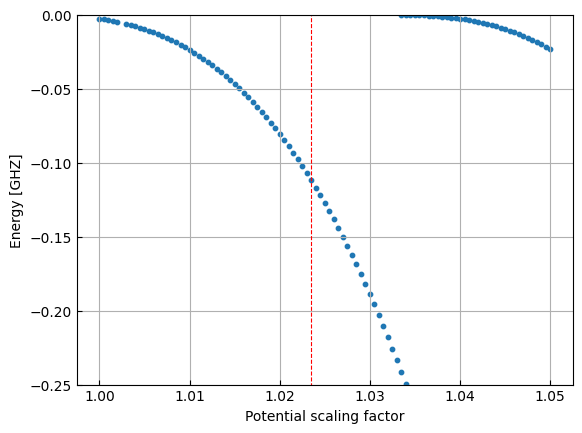

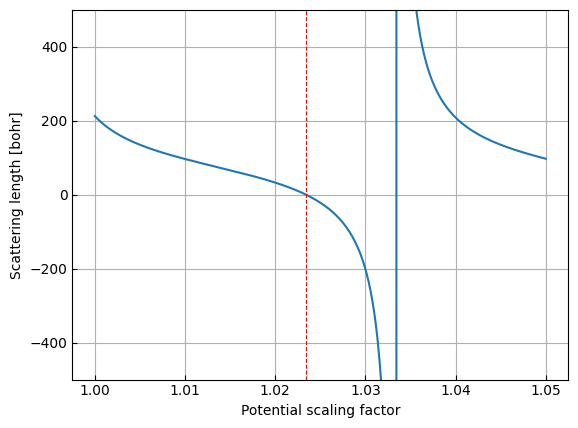

In [27]:
filename = f"{DATA_PATH}/srf_rb_bounds_scale_n_0_triplet.output"
data, unit = get_bound_energies(filename, parameter=Parameter.ScalingFactor)

field_points = []
energy_points = []
for field, energies in data:
    for energy in energies:
        field_points.append(field)
        energy_points.append(energy)
        
fig, ax = utility.plot()
ax.vlines([1.0234326602081], [-500], [500], color = "red", linestyles="--", linewidth=0.8)

ax.scatter(field_points, energy_points, s = 10)
ax.set_ylabel(f"Energy [{unit}]")
ax.set_xlabel("Potential scaling factor")
ax.set_ylim(-0.25, 0)
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_bounds_n_0_triplet.pdf")

####################################

data = utility.load(f"{DATA_PATH}/srf_rb_potential_scaling_n_max_0.dat")
scalings = data[:, 0]
singlet = data[:, 1]
triplet = data[:, 2]

fig, ax = utility.plot()
ax.plot(scalings, triplet)
ax.vlines([1.0234326602081], [-500], [500], color = "red", linestyles="--", linewidth=0.8)

ax.set_ylim(-500, 500)
ax.set_xlabel("Potential scaling factor")
ax.set_ylabel("Scattering length [bohr]");
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_scattering_n_0_triplet.pdf")

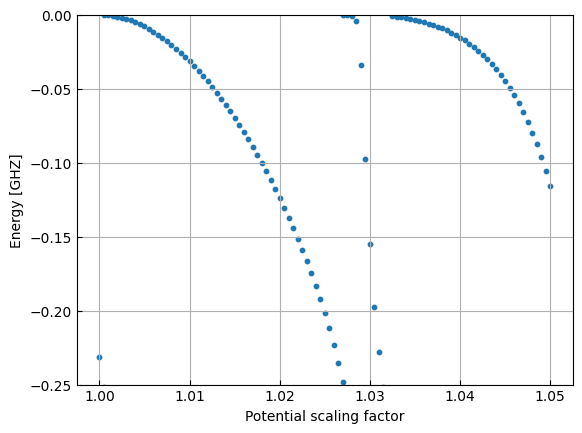

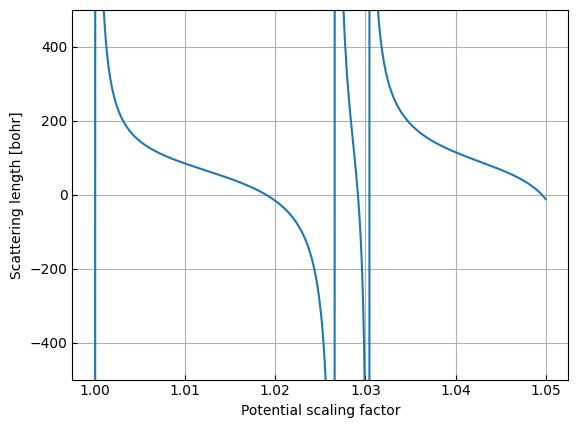

In [76]:
filename = f"{DATA_PATH}/srf_rb_bounds_scale_n_1_triplet.output"
data, unit = get_bound_energies(filename, parameter=Parameter.ScalingFactor)

field_points = []
energy_points = []
for field, energies in data:
    for energy in energies:
        field_points.append(field)
        energy_points.append(energy)
        
fig, ax = utility.plot()
ax.scatter(field_points, energy_points, s = 10)
ax.set_ylabel(f"Energy [{unit}]")
ax.set_xlabel("Potential scaling factor")
ax.set_ylim(-0.25, 0)
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_bounds_n_1_triplet.pdf")

####################################

data = utility.load(f"{DATA_PATH}/srf_rb_potential_scaling_n_max_1.dat")
scalings = data[:, 0]
singlet = data[:, 1]
triplet = data[:, 2]

fig, ax = utility.plot()
ax.plot(scalings, triplet)

ax.set_ylim(-500, 500)
ax.set_xlabel("Potential scaling factor")
ax.set_ylabel("Scattering length [bohr]");
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_scattering_n_1_triplet.pdf")

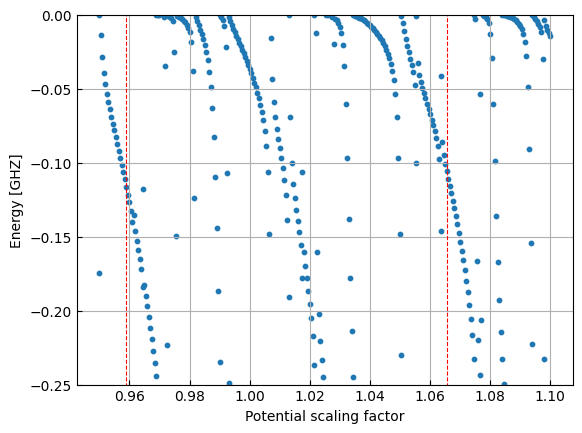

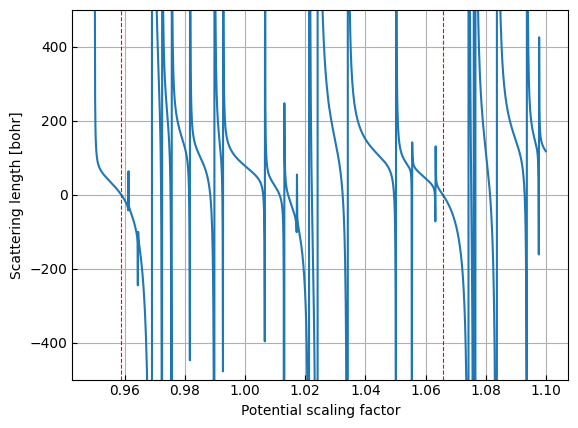

In [28]:
filename = f"{DATA_PATH}/srf_rb_bounds_scale_n_5_triplet.output"
data, unit = get_bound_energies(filename, parameter=Parameter.ScalingFactor)

field_points = []
energy_points = []
for field, energies in data:
    for energy in energies:
        field_points.append(field)
        energy_points.append(energy)
        
fig, ax = utility.plot()
ax.vlines([0.9587806804328, 1.0657638160382], [-500], [500], color = "red", linestyles="--", linewidth=0.8)

ax.scatter(field_points, energy_points, s = 10)
ax.set_ylabel(f"Energy [{unit}]")
ax.set_xlabel("Potential scaling factor")
ax.set_ylim(-0.25, 0)
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_bounds_n_5_triplet.pdf")

####################################

data = utility.load(f"{DATA_PATH}/srf_rb_potential_scaling_n_max_5_extended.dat")
scalings = data[:, 0]
singlet = data[:, 1]
triplet = data[:, 2]

fig, ax = utility.plot()
ax.plot(scalings, triplet)
ax.vlines([0.9587806804328, 1.0657638160382], [-500], [500], color = "red", linestyles="--", linewidth=0.8)

ax.set_ylim(-500, 500)
ax.set_xlabel("Potential scaling factor")
ax.set_ylabel("Scattering length [bohr]");
fig.savefig(f"{SAVE_PATH}/SrF_Rb_pot_scaling_scattering_n_5_triplet.pdf")

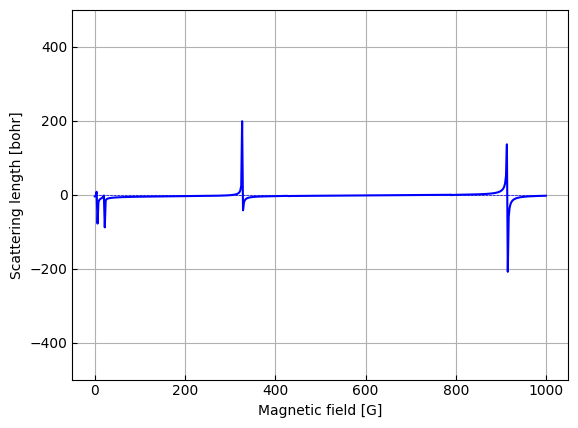

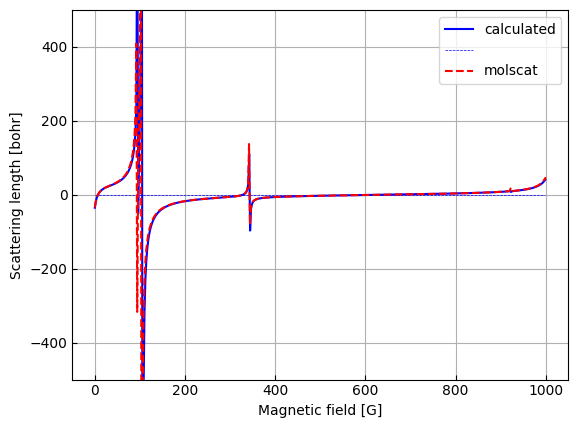

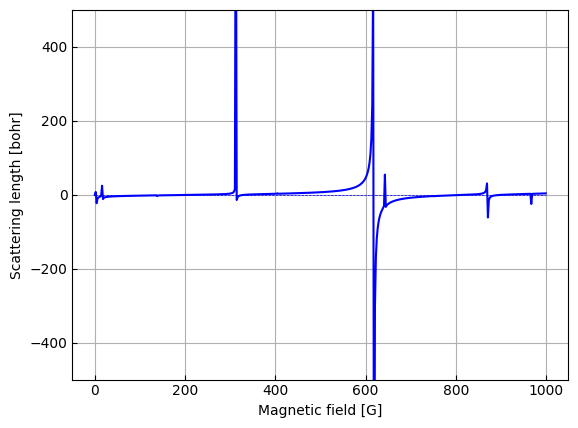

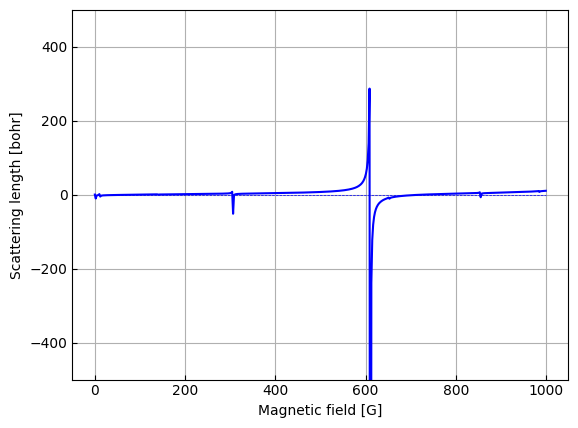

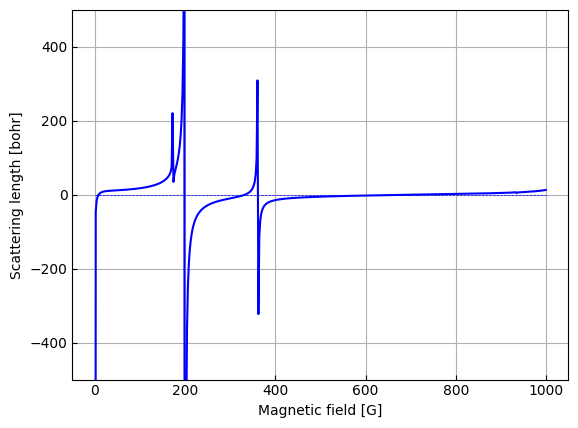

In [13]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scaled_scattering_n_0.json")

n = len(data.parameters)
n_half = n // 2
points = data.parameters[0:n_half]
lengths = data.s_lengths()[0:n_half]

fig, ax = utility.plot()
ax.plot(points, lengths.real, color = "blue")
ax.plot(points, lengths.imag, color = "blue", linestyle="--", linewidth = 0.5)

ax.set_ylim(-500, 500)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Scattering length [bohr]")
fig.savefig(f"{SAVE_PATH}/SrF_Rb_scattering_n_0_scaled.pdf")

data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scaled_scattering_n_5.json")

n = len(data.parameters)
n_half = n // 2
points = data.parameters[0:n_half]
lengths = data.s_lengths()[0:n_half]

fig, ax = utility.plot()
ax.plot(points, lengths.real, color = "blue")
ax.plot(points, lengths.imag, color = "blue", linestyle="--", linewidth = 0.5)

try:
	data = read_molscat_field_dependence(f"{DATA_PATH}/srf_rb_scattering_n_5_scaled_molscat.3")
	ax.plot(data[:, 0], data[:, 1], color = "red", label="molscat", linestyle="--")
	ax.legend(["calculated", "", "molscat"])
except:
	pass

ax.set_ylim(-500, 500)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Scattering length [bohr]")
fig.savefig(f"{SAVE_PATH}/SrF_Rb_scattering_n_5_scaled.pdf")

data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scaled_scattering_n_5_v2.json")

n = len(data.parameters)
n_half = n // 2
points = data.parameters[0:n_half]
lengths = data.s_lengths()[0:n_half]

fig, ax = utility.plot()
ax.plot(points, lengths.real, color = "blue")
ax.plot(points, lengths.imag, color = "blue", linestyle="--", linewidth = 0.5)

ax.set_ylim(-500, 500)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Scattering length [bohr]");
fig.savefig(f"{SAVE_PATH}/SrF_Rb_scattering_n_5_scaled_v2.pdf")

data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scaled_scattering_n_5_v3.json")

n = len(data.parameters)
n_half = n // 2
points = data.parameters[0:n_half]
lengths = data.s_lengths()[0:n_half]

fig, ax = utility.plot()
ax.plot(points, lengths.real, color = "blue")
ax.plot(points, lengths.imag, color = "blue", linestyle="--", linewidth = 0.5)

ax.set_ylim(-500, 500)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Scattering length [bohr]");
fig.savefig(f"{SAVE_PATH}/SrF_Rb_scattering_n_5_scaled_v3.pdf")

data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scaled_scattering_n_5_v4.json")

n = len(data.parameters)
n_half = n // 2
points = data.parameters[0:n_half]
lengths = data.s_lengths()[0:n_half]

fig, ax = utility.plot()
ax.plot(points, lengths.real, color = "blue")
ax.plot(points, lengths.imag, color = "blue", linestyle="--", linewidth = 0.5)

ax.set_ylim(-500, 500)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Scattering length [bohr]");
fig.savefig(f"{SAVE_PATH}/SrF_Rb_scattering_n_5_scaled_v4.pdf")

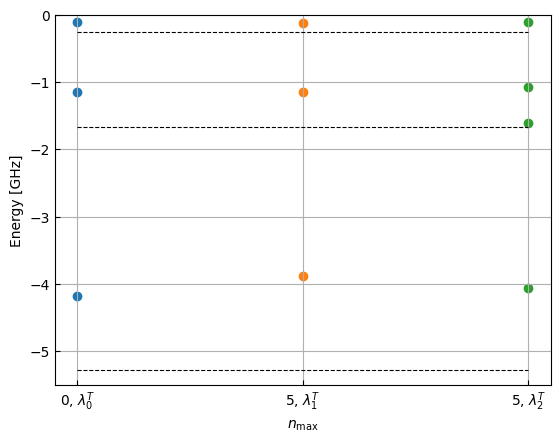

In [ ]:
fig, ax = utility.plot()

bounds = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_0_triplet_a0.dat")
ax.scatter([r"0, $\lambda^T_0$" for _ in bounds], bounds)

bounds = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_5_triplet_a0.dat")
ax.scatter([r"5, $\lambda^T_1$" for _ in bounds], bounds)

bounds = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_5_triplet_a0_v2.dat")
ax.scatter([r"5, $\lambda^T_2$" for _ in bounds], bounds)

x = [r"0, $\lambda^T_0$", r"5, $\lambda^T_1$", r"5, $\lambda^T_2$"]
for value in [0.246, 1.660, 5.280]:
	ax.plot(x, [-value for _ in range(3)], linestyle="--", color="black", linewidth=0.8)

ax.set_ylabel("Energy [GHz]")
ax.set_xlabel(r"$n_\text{max}$");
ax.set_ylim(-5.5, 0);
fig.savefig(f"{SAVE_PATH}/SrF_Rb_bounds_triplet_a0.pdf")

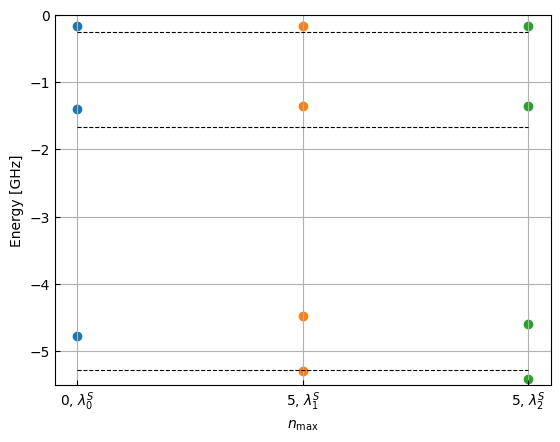

In [20]:
fig, ax = utility.plot()

bounds = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_0_singlet_a0.dat")
ax.scatter([r"0, $\lambda^S_0$" for _ in bounds], bounds)

bounds = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_5_singlet_a0.dat")
ax.scatter([r"5, $\lambda^S_1$" for _ in bounds], bounds)

bounds = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_5_singlet_a0_v2.dat")
ax.scatter([r"5, $\lambda^S_2$" for _ in bounds], bounds)

x = [r"0, $\lambda^S_0$", r"5, $\lambda^S_1$", r"5, $\lambda^S_2$"]
for value in [0.246, 1.660, 5.280]:
	ax.plot(x, [-value for _ in range(3)], linestyle="--", color="black", linewidth=0.8)

ax.set_ylabel("Energy [GHz]")
ax.set_xlabel(r"$n_\text{max}$");
ax.set_ylim(-5.5, 0);
fig.savefig(f"{SAVE_PATH}/SrF_Rb_bounds_singlet_a0.pdf")

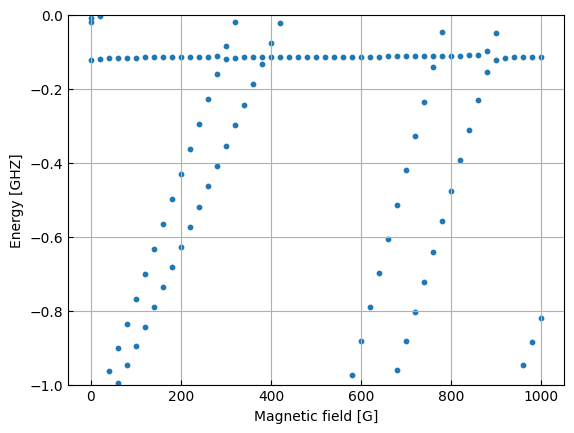

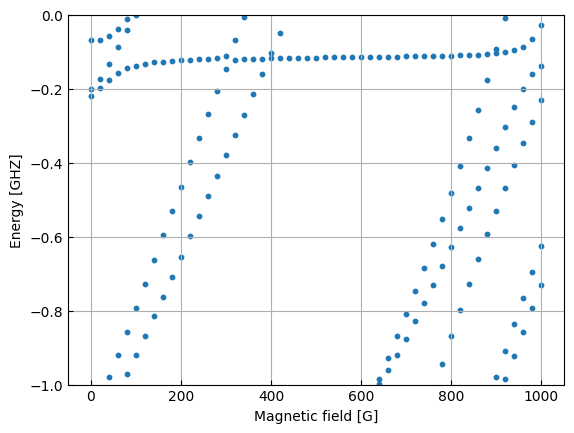

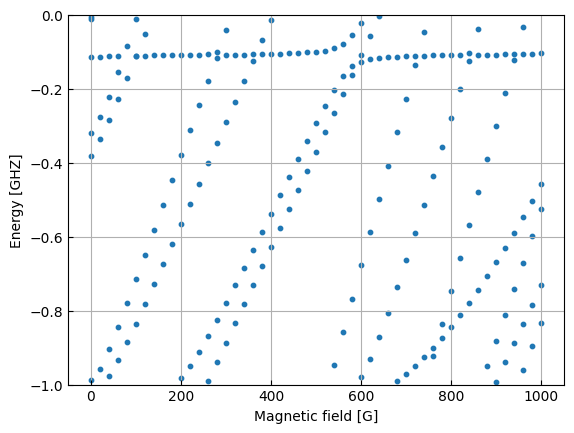

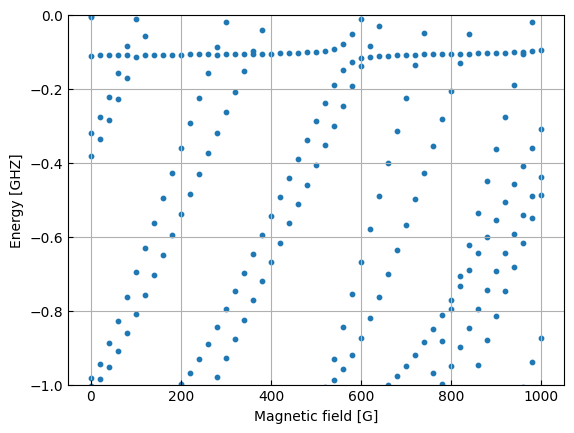

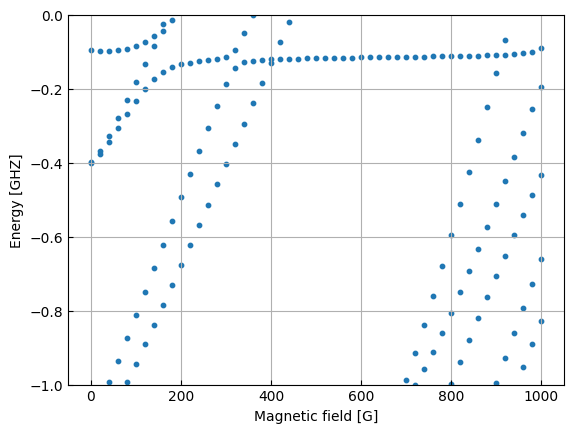

In [11]:
filename = f"{DATA_PATH}/srf_rb_bounds_n_0_scale_molscat.output"
data, unit = get_bound_energies(filename, parameter=Parameter.MagneticField)

field_points = []
energy_points = []
for field, energies in data:
    for energy in energies:
        field_points.append(field)
        energy_points.append(energy)
        
fig, ax = utility.plot()

ax.scatter(field_points, energy_points, s = 10)
ax.set_ylabel(f"Energy [{unit}]")
ax.set_xlabel("Magnetic field [G]")
ax.set_ylim(-1, 0)
fig.savefig(f"{SAVE_PATH}/SrF_Rb_bounds_n_0_scaled.pdf")

filename = f"{DATA_PATH}/srf_rb_bounds_n_5_scale_molscat.output"
data, unit = get_bound_energies(filename, parameter=Parameter.MagneticField)

field_points = []
energy_points = []
for field, energies in data:
    for energy in energies:
        field_points.append(field)
        energy_points.append(energy)
        
fig, ax = utility.plot()

ax.scatter(field_points, energy_points, s = 10)
ax.set_ylabel(f"Energy [{unit}]")
ax.set_xlabel("Magnetic field [G]")
ax.set_ylim(-1, 0)
fig.savefig(f"{SAVE_PATH}/SrF_Rb_bounds_n_5_scaled.pdf")

filename = f"{DATA_PATH}/srf_rb_bounds_n_5_scale_molscat_v2.output"
data, unit = get_bound_energies(filename, parameter=Parameter.MagneticField)

field_points = []
energy_points = []
for field, energies in data:
    for energy in energies:
        field_points.append(field)
        energy_points.append(energy)
        
fig, ax = utility.plot()

ax.scatter(field_points, energy_points, s = 10)
ax.set_ylabel(f"Energy [{unit}]")
ax.set_xlabel("Magnetic field [G]")
ax.set_ylim(-1, 0)
fig.savefig(f"{SAVE_PATH}/SrF_Rb_bounds_n_5_scaled_v2.pdf")

filename = f"{DATA_PATH}/srf_rb_bounds_n_5_scale_molscat_v3.output"
data, unit = get_bound_energies(filename, parameter=Parameter.MagneticField)

field_points = []
energy_points = []
for field, energies in data:
    for energy in energies:
        field_points.append(field)
        energy_points.append(energy)
        
fig, ax = utility.plot()

ax.scatter(field_points, energy_points, s = 10)
ax.set_ylabel(f"Energy [{unit}]")
ax.set_xlabel("Magnetic field [G]")
ax.set_ylim(-1, 0)
fig.savefig(f"{SAVE_PATH}/SrF_Rb_bounds_n_5_scaled_v3.pdf")

filename = f"{DATA_PATH}/srf_rb_bounds_n_5_scale_molscat_v4.output"
data, unit = get_bound_energies(filename, parameter=Parameter.MagneticField)

field_points = []
energy_points = []
for field, energies in data:
    for energy in energies:
        field_points.append(field)
        energy_points.append(energy)
        
fig, ax = utility.plot()

ax.scatter(field_points, energy_points, s = 10)
ax.set_ylabel(f"Energy [{unit}]")
ax.set_xlabel("Magnetic field [G]")
ax.set_ylim(-1, 0)
fig.savefig(f"{SAVE_PATH}/SrF_Rb_bounds_n_5_scaled_v4.pdf")

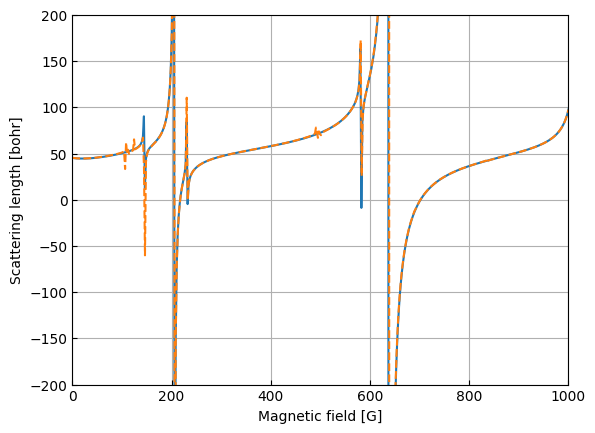

In [10]:
fig, ax = utility.plot()

data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scatterings_ground_n_max_10_n_tot_0.json")
ax.plot(data.parameters, data.s_lengths().real)

data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scatterings_ground_n_max_10_n_tot_1.json")
ax.plot(data.parameters, data.s_lengths().real, linestyle="--")

ax.set_ylim(-200, 200)
ax.set_xlim(0, 1000)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Scattering length [bohr]");

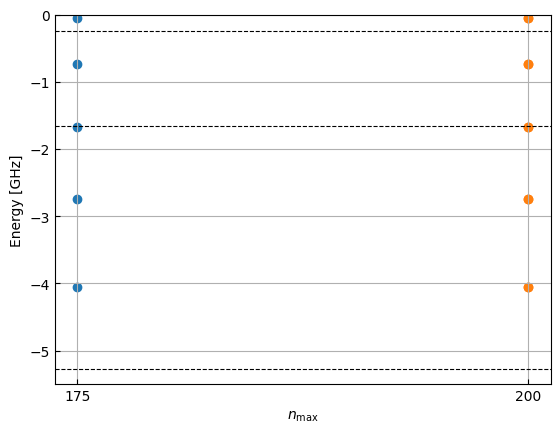

In [ ]:
fig, ax = utility.plot()

bounds = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")
ax.scatter([r"175" for _ in bounds], bounds)

bounds = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_200_triplet.dat")
ax.scatter([r"200" for _ in bounds], bounds)

for value in [0.246, 1.660, 5.280]:
	ax.axhline(-value, linestyle="--", color="black", linewidth=0.8)

ax.set_ylabel("Energy [GHz]")
ax.set_xlabel(r"$n_\text{max}$");
ax.set_ylim(-5.5, 0);

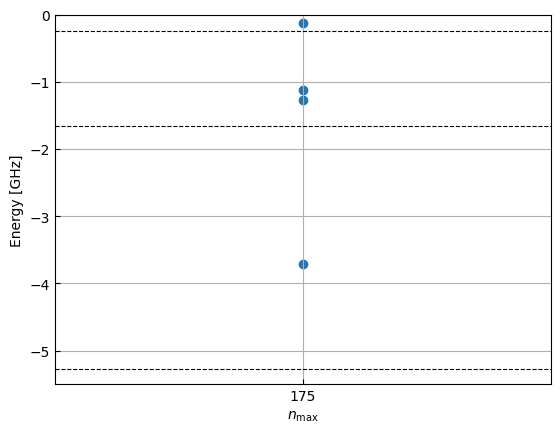

In [ ]:
fig, ax = utility.plot()

bounds = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")
ax.scatter([r"175" for _ in bounds], bounds)

# bounds = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_200_triplet.dat")
# ax.scatter([r"200" for _ in bounds], bounds)

for value in [0.246, 1.660, 5.280]:
	ax.axhline(-value, linestyle="--", color="black", linewidth=0.8)

ax.set_ylabel("Energy [GHz]")
ax.set_xlabel(r"$n_\text{max}$");
ax.set_ylim(-5.5, 0);